# Sales Analysis

#### Import necessary libraries

In [212]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import numpy as np

#### Merge data from each month into one CSV

In [182]:
# Path where all files are located
path = r"C:\Users\RzeszutekKatarzyna\python\DataAnalysisProjects\1.SalesAnalysis\SalesData"

# Creating a list with all files' names
files = [file for file in os.listdir(path)]
for file in files:
    print(file)

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+'/'+file)
    all_months_data = pd.concat([all_months_data, df])

# Saving concatenated data to one excel
all_months_data.to_csv('all_months_data.csv', index=False)    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [183]:
# Reading all_data file
path2 = r"C:\Users\RzeszutekKatarzyna\python\DataAnalysisProjects\1.SalesAnalysis/all_months_data.csv"
all_data = pd.read_csv(path2)
display(all_data.head(10))
display(all_data.tail(10))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186839,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
186840,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186841,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186842,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
186843,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### Augment data with additional columns

In [184]:
# Creating a list with the same values as in OrderDate, but starting with 0
new_Order_Date = []
for row in all_data['Order Date']:
    row = str(row)
    value = row.split('/')
    v = value[0]
    if len(v) == 1:
        v = '0'+v
        new_Order_Date.append(v)
    else:
        new_Order_Date.append(v)

In [185]:
# Adding month column
all_data['Month'] = new_Order_Date
display(all_data.head(20))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",04
5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",04
6,176563,Bose SoundSport Headphones,1,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101",04
7,176564,USB-C Charging Cable,1,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301",04
8,176565,Macbook Pro Laptop,1,1700,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016",04
9,176566,Wired Headphones,1,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215",04


#### Clean up the data

In [186]:
# Checking how many of NaN we have
all_data.isna().sum()

# Checking how our NaN rows looks like
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# Drop rows of NaN
all_data = all_data.dropna(how='any') 
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [187]:
# Looking for different not numerical values
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
185163,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
185550,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186562,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186631,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [188]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4
5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",4
6,176563,Bose SoundSport Headphones,1,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101",4
7,176564,USB-C Charging Cable,1,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301",4
8,176565,Macbook Pro Laptop,1,1700,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016",4
9,176566,Wired Headphones,1,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215",4


#### Question 1: What was the best month for sale? How much was earned that month?

In [189]:
# Converting columns to numeric ones
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [190]:
# Adding a sales column
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [191]:
results = all_data.groupby('Month').sum()

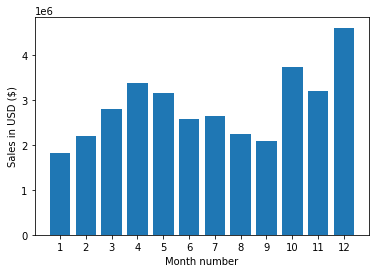

In [192]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show() # 33:14 yt video

#### What US city has highest number of sales?

In [193]:
# Retrieving city data from Purchase Address
def get_city(address):
    value = address.split(',')[1]
    output = value.strip()
    return output

As there are many cities with the same names from different states, information about States will be retrieved

In [194]:
# Function which adds the State information
def get_state(address):
    value = address.split(',')[2]
    state = value.split()[0]
    state = state.strip()
    return state

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
display(all_data.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [195]:
# Aggregating by the city
results = all_data.groupby('City').sum()['Sales']
display(results)

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

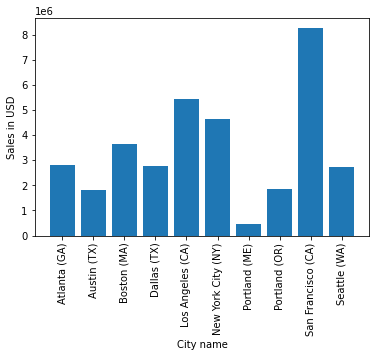

In [196]:
# Plotting the values
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, results)
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisement to maximize likelihood of customer's buying product?

In [197]:
# Converting Order Date to date time object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
display(all_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [198]:
# Adding an hour column to data
all_data['Hour'] = all_data['Order Date'].dt.hour

# Adding a minute column
all_data['Minute'] = all_data['Order Date'].dt.minute

# Adding a Count columns
all_data['Count'] = 1
display(all_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,1
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,1
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,1
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,1


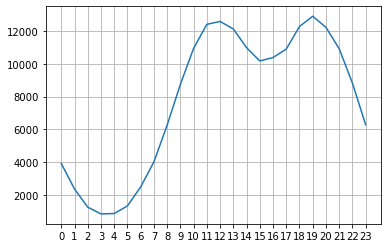

In [199]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]
all_data.groupby('Hour').count()['Count']

# Plotting results
plt.plot(hours, all_data.groupby('Hour').count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()

The answer is - the best hour to display advertisement to maximize likelihood of customer's buying product is between 11 am and 7 pm.
Maybe it would be good to make such charts for specific cities

#### Question 4: What products are the most often sold together?

In [200]:
# Some products have the same Order ID and were delivered to the same address. That means, they were ordered together.
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3,1
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46,1
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58,1
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38,1
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5,1


In [201]:
# Creating new data frame, which has duplicated values of Order ID
df = all_data[all_data['Order ID'].duplicated(keep=False)] # We passed false cause we want to keep everything

# Items which were ordered together will now be in one line
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head(20)


C:\Users\RzeszutekKatarzyna\AppData\Local\Temp\ipykernel_18248\4017618737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone, Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones, Bose SoundSport He..."
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,1,"AAA Batteries (4-pack), Google Phone"
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,1,"AAA Batteries (4-pack), Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,1,"Lightning Charging Cable, USB-C Charging Cable"
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,1,"Lightning Charging Cable, USB-C Charging Cable"


In [202]:
# Now we have all values in Grouped column duplicated, so we want to get rid of it
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
128,176681,"Apple Airpods Headphones, ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
188,176739,"34in Ultrawide Monitor, Google Phone"
224,176774,"Lightning Charging Cable, USB-C Charging Cable"
232,176781,"iPhone, Lightning Charging Cable"


In [203]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # How often 2 items were ordered together

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


What can we do with such information? Maybe use this infprmation to make smart deals for them or use this information to promotions 

#### What product sold the most? Why do you think it sold the most?

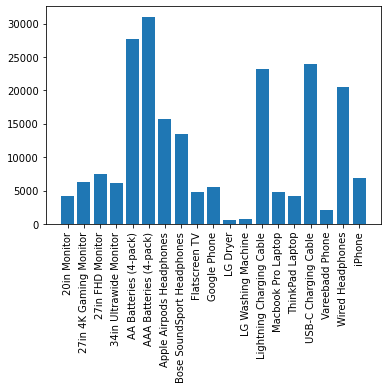

In [204]:
quantity_ordered = all_data.groupby('Product')['Quantity Ordered']
products = [product for product, df in quantity_ordered]
plt.bar(products, quantity_ordered.sum())
plt.xticks(products, rotation='vertical', size=10)
plt.show()


Why items like AAA batteries are so much better sold than others? Because they are cheaper. As a data scientist it is good to prove it.